In [84]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import interpolate


from matplotlib import rcParams, rc

# set rcParams ~~~~~~~~~~~~~~~~~~~~~~~~
rcParams['axes.linewidth'] =    2
rcParams['xtick.major.size'] =  6
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.size'] =  3
rcParams['xtick.minor.width'] = 2
rcParams['ytick.major.size'] =  6
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.size'] =  3
rcParams['ytick.minor.width'] = 2
font = {'size' : 16, 'weight' : 'bold'}
rc('font', **font)

In [85]:
def get_vlos(file, r_p, omega, level):
    colnames = ['lat', 'lon', 'level', 'alt', 'pres', 'temp',
                            'u', 'v', 'w',
                            'aero_sw_tau_1', 'sw_asym_1', 'sw_pi0_1',
                            'aero_sw_tau_2', 'sw_asym_2', 'sw_pi0_2',
                            'aero_sw_tau_3', 'sw_asym_3', 'sw_pi0_3',
                            'aero_sw_tau_4', 'sw_asym_4', 'sw_pi0_4',
                            'incident_frac']
    df = pd.read_csv(file, delim_whitespace=True, names=colnames, header=None)
    subobslon = 0
    dtr = 0.0174533 # Degrees to radians
    
    # I only care about some spots
    df = df[(df['level'] == level)].reset_index(drop=True)
    
    df['vlos'] =  -df.u * np.sin(subobslon - (df.lon * dtr)) + \
                df.v * np.cos(subobslon - (df.lon * dtr)) * np.sin(df.lat * dtr) - \
                omega * (r_p + df.alt) * np.sin(subobslon - (df.lon * dtr)) * np.cos(df.lat * dtr)
    
    df.to_csv('test.txt', index=False, sep=' ')
    X = list(df['lat'])
    Y = list(df['lon'])
    vlos = list(df['vlos'])
    temp = list(df['temp'])
    return X, Y, vlos, temp






def add_vlos(file, r_p, omega, inc):
    df = pd.read_csv(file + '.txt', delim_whitespace=True, names=('lat', 'lon', 'level',
                                                              'alt', 'pres', 'temp',
                                                              'u', 'v', 'w',
                                                              'aero_sw_tau_1', 'sw_asym_1', 'sw_pi0_1',
                                                              'aero_sw_tau_2', 'sw_asym_2', 'sw_pi0_2',
                                                              'aero_sw_tau_3', 'sw_asym_3', 'sw_pi0_3',
                                                              'aero_sw_tau_4', 'sw_asym_4', 'sw_pi0_4',
                                                              'incident_frac'))
    subobslon = 0
    dtr = 0.0174533 # Degrees to radians
    df['vlos'] =  -df.u * np.sin(subobslon - (df.lon * dtr)) + \
                df.v * np.cos(subobslon - (df.lon * dtr)) * np.sin(df.lat * dtr) - \
                np.cos(inc) * (omega * (r_p + df.alt) * np.sin(subobslon - (df.lon * dtr)) * np.cos(df.lat * dtr)) 

    np.savetxt(file + '_vlos.txt', df.to_numpy(),
    fmt='%12.4E %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E  %12.4E\t')

1848.8 1060.2


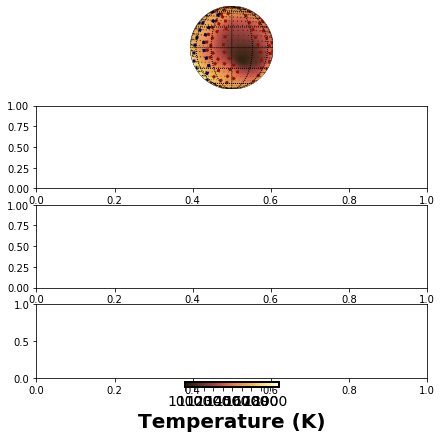

In [36]:
# colormap
cm_name = 'lajolla'
cm_file = np.loadtxt(f'ScientificColourMaps5/lajolla/lajolla.txt')
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file[::-1])

fig, ax = plt.subplots(4, 1, figsize=(7, 7))



files = ['/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLOUDY-250_phase_0.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLOUDY-250_phase_90.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLOUDY-250_phase_180.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLOUDY-250_phase_270.0_inc_1.152']

files = ['/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLEAR-250_phase_0.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLEAR-250_phase_90.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLEAR-250_phase_180.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLEAR-250_phase_270.0_inc_1.152']

files = ['/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLEAR-250_phase_0.0_inc_1.152']

figure_names = ['clear-1', 'clear-2', 'clear-3', 'clear-4']


pressure_mins = [79.8] * len(files)

i = 0
for file in files:  
    pressure_min = pressure_mins[i]
    r_p = 6.99e7
    omega = 2.063e-5
    inc = 1.152


    add_vlos(file, r_p, omega, inc)
    df = pd.read_table(file + '_vlos.txt',
                        delim_whitespace=True,
                        names=('lat', 'lon', 'level',
                                'alt', 'pressure', 'temp',
                                'u', 'v', 'w',
                                'aero_sw_tau_1', 'sw_asym_1', 'sw_pi0_1',
                                'aero_sw_tau_2', 'sw_asym_2', 'sw_pi0_2',
                                'aero_sw_tau_3', 'sw_asym_3', 'sw_pi0_3',
                                'aero_sw_tau_4', 'sw_asym_4', 'sw_pi0_4',
                                'incident_frac','vlos'))

    all_lats = sorted(list(set(df.lat)))
    all_lons = sorted(list(set(df.lon)))
    
    lats = []
    lons = []
    temps = []
    us = []
    vs = []
    vloss = []

    for lat in all_lats:
        for lon in all_lons:
            temp_df = df[df.lat == lat]
            temp_df = temp_df[temp_df.lon == lon]
            temp_df = temp_df.reset_index()

            k = len(temp_df.pressure) - 1
            while temp_df.pressure[k] * 1e-2 > pressure_min:
                k = k - 1

            lats.append(lat)
            lons.append(lon)
            temps.append(temp_df.temp[k])
            vloss.append(temp_df.vlos[k])
            us.append(temp_df.u[k])
            vs.append(temp_df.v[k])
            

    new_lats = np.reshape(lats, (48, 96))
    new_lons = np.reshape(lons, (48, 96))

    final_lats = new_lats * np.pi / 180
    final_lons = new_lons * np.pi / 180

    final_temps = np.reshape(temps, (48, 96))

    final_us = np.reshape(us, (48, 96))
    final_vs = np.reshape(vs, (48, 96))
    final_vlos = np.reshape(vloss, (48, 96))


    # set up orthographic map projection with
    # perspective of satellite looking down at 50N, 100W.
    # use low resolution coastlines.
    map = Basemap(projection='ortho',lat_0=0,lon_0=180,resolution='l', ax=ax[i])

    # draw the edge of the map projection region (the projection limb)
    map.drawmapboundary(fill_color='aqua')

    # draw lat/lon grid lines every 30 degrees.
    map.drawmeridians(np.arange(0,360,30))
    map.drawparallels(np.arange(-90,90,30))


    # compute native map projection coordinates of lat/lon grid.
    x, y = map(final_lons*180./np.pi, final_lats*180./np.pi)

    # Graph the lines
    #map.contour(x, y, final_vlos, levels=[0],
    #                              colors='white', linewidths=3, linestyles='dotted')
    map.contour(x, y, final_vlos, levels=[-4000, -3000, -2000, -1000],
                                  colors='#8f1402', linewidths=3, linestyles='dotted')
    
    map.contour(x, y, final_vlos, levels=[250, 500, 750, 1000],
                                  colors='#8f1402', linewidths=3, linestyles='dotted')
    map.contour(x, y, final_vlos, levels=[1000, 2000, 3000, 4000], 
                                  colors='#040273', linewidths=3, linestyles='dotted')

    print (np.amax(final_temps), np.amin(final_temps))
    # Graph temperature
    cs1 = map.contourf(x, y, final_temps, 100, cmap=my_colors, levels=np.arange(1000, 2000, 10))
    #cbar = plt.colorbar(cs1, orientation='horizontal', fraction=.057, pad=0.05)

    # Graph the wind vectors
    map.quiver(x[::2,::2], y[::2,::2], final_us[::2,::2], final_vs[::2,::2],
              headwidth=8, scale = 180000, headlength=5, alpha=1.0)
    
    cbar = plt.colorbar(cs1, orientation='horizontal', fraction=.057, pad=0.05, aspect=20)
    cbar.outline.set_linewidth(2)
    cbar.set_label(label='Temperature (K)',weight='bold', fontsize=20)
    cbar.ax.tick_params(labelsize=14) 

    #plt.savefig('/home/imalsky/Desktop/{}.png'.format(figure_names[i]), bbox_inches='tight', dpi=250)
    i = i + 1
    #plt.clf()
    


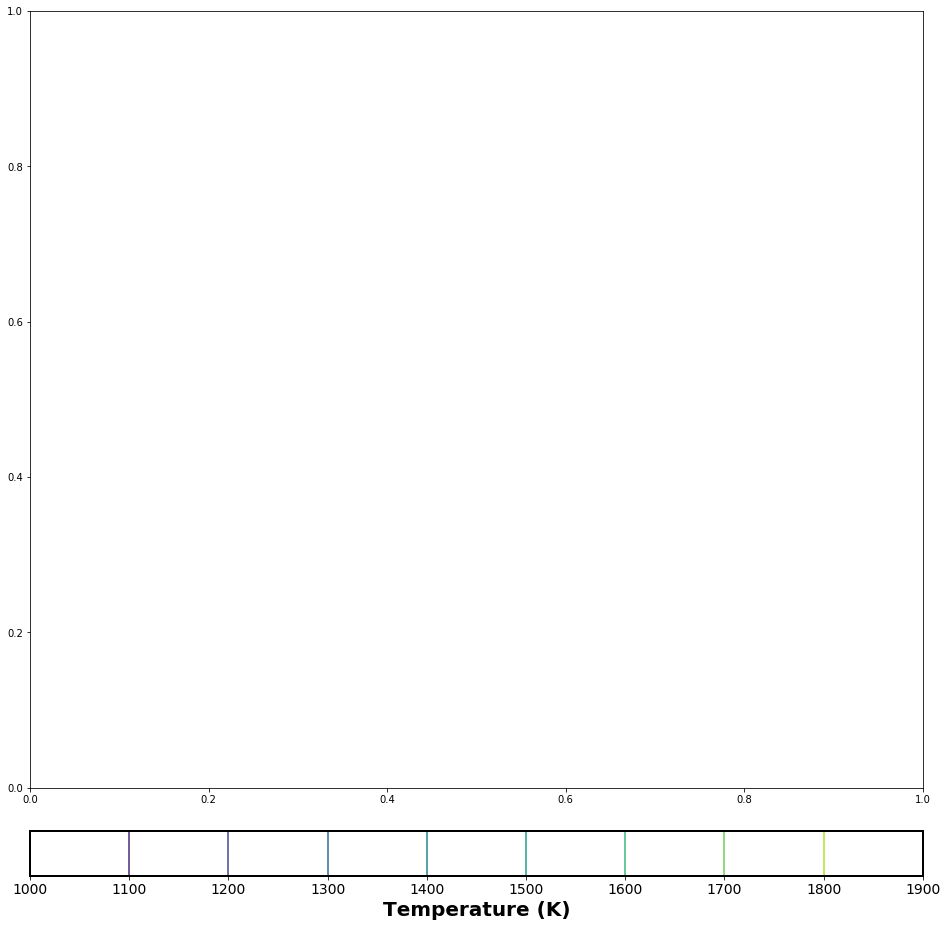

In [41]:
fig, ax = plt.subplots(1, figsize=(16, 16))

cbar = plt.colorbar(cs1, orientation='horizontal', fraction=.057, pad=0.05, aspect=20)
cbar.outline.set_linewidth(2)
cbar.set_label(label='Temperature (K)',weight='bold', fontsize=20)
cbar.ax.tick_params(labelsize=14) 
#cbar.ax.set_yticklabels(fontsize=16, weight='bold')


plt.savefig('/home/imalsky/Desktop/sidebar.png', bbox_inches='tight', dpi=250)


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


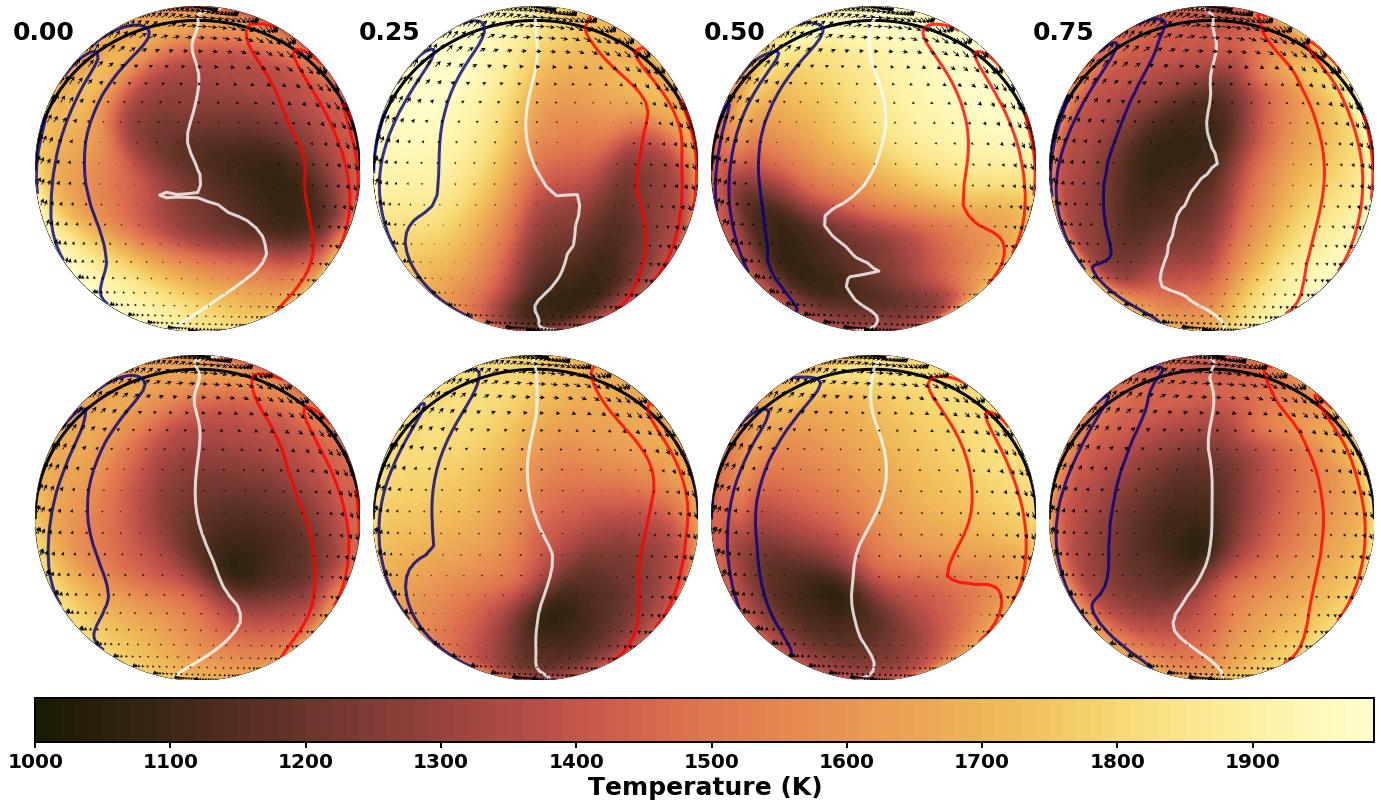

In [187]:
# colormap
cm_name = 'lajolla'
cm_file = np.loadtxt(f'ScientificColourMaps5/lajolla/lajolla.txt')
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file[::-1])


fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(24,16))
plt.subplots_adjust(wspace=0.04, hspace=-0.065)


files = ['/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLOUDY-250_phase_0.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLOUDY-250_phase_90.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLOUDY-250_phase_180.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLOUDY-250_phase_270.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLEAR-250_phase_0.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLEAR-250_phase_90.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLEAR-250_phase_180.0_inc_1.152',
         '/home/imalsky/Desktop/big-init-files/init_UPS-LOW-G-CLEAR-250_phase_270.0_inc_1.152']


figure_names = ['clear-1', 'clear-2', 'clear-3', 'clear-4']


pressure_mins = [79.8] * len(files)

i = 0
z = 0
for file in files:
    pressure_min = pressure_mins[i]
    r_p = 6.99e7
    omega = 2.063e-5
    inc = 1.152


    add_vlos(file, r_p, omega, inc)
    df = pd.read_table(file + '_vlos.txt',
                        delim_whitespace=True,
                        names=('lat', 'lon', 'level',
                                'alt', 'pressure', 'temp',
                                'u', 'v', 'w',
                                'aero_sw_tau_1', 'sw_asym_1', 'sw_pi0_1',
                                'aero_sw_tau_2', 'sw_asym_2', 'sw_pi0_2',
                                'aero_sw_tau_3', 'sw_asym_3', 'sw_pi0_3',
                                'aero_sw_tau_4', 'sw_asym_4', 'sw_pi0_4',
                                'incident_frac','vlos'))

    all_lats = sorted(list(set(df.lat)))
    all_lons = sorted(list(set(df.lon)))
    
    lats = []
    lons = []
    temps = []
    us = []
    vs = []
    vloss = []

    for lat in all_lats:
        for lon in all_lons:
            temp_df = df[df.lat == lat]
            temp_df = temp_df[temp_df.lon == lon]
            temp_df = temp_df.reset_index()

            k = len(temp_df.pressure) - 1
            while temp_df.pressure[k] * 1e-2 > pressure_min:
                k = k - 1

            lats.append(lat)
            lons.append(lon)
            temps.append(temp_df.temp[k])
            vloss.append(temp_df.vlos[k])
            us.append(temp_df.u[k])
            vs.append(temp_df.v[k])
            

    new_lats = np.reshape(lats, (48, 96))
    new_lons = np.reshape(lons, (48, 96))

    final_lats = new_lats * np.pi / 180
    final_lons = new_lons * np.pi / 180

    final_temps = np.reshape(temps, (48, 96))

    final_us = np.reshape(us, (48, 96))
    final_vs = np.reshape(vs, (48, 96))
    final_vlos = np.reshape(vloss, (48, 96))    
    
    
    
    j = 0
    if i > 3:
        j = 1
        z = i - 4
    if i > 3:
        print (j, z)
        map = Basemap(projection='ortho',lat_0=0,lon_0=180,resolution='l', ax=ax[j, z])
    else:
        print (j, i)
        map = Basemap(projection='ortho',lat_0=0,lon_0=180,resolution='l', ax=ax[j, i])
    map.drawmapboundary(fill_color='aqua')

    
    # compute native map projection coordinates of lat/lon grid.
    x, y = map(final_lons*180./np.pi, final_lats*180./np.pi)

    
    # Graph temperature
    cs1 = map.contourf(x, y, final_temps, 100, cmap=my_colors, levels=np.arange(1000, 2000, 10))

    map.contour(x, y, final_vlos, levels=[0],colors='white', linewidths=3,zorder=3, alpha=0.8)

    map.contour(x, y, final_vlos, levels=[-4000, -3000, -2000, -1000], colors='red', alpha=0.8,
                linewidths=3, linestyles='solid',zorder=3)

    map.contour(x, y, final_vlos, levels=[1000, 2000, 3000, 4000],  alpha=0.8,
                                  colors='navy', linewidths=3,zorder=5)


    map.drawgreatcircle(-90, 0, 180, 66, linewidth=3, color='black', linestyle='solid', zorder=1)
    map.drawgreatcircle(90,  0, 180, 66, linewidth=3, color='black', linestyle='solid', zorder=2)

    # Graph the wind vectors
    map.quiver(x[::2,::2], y[::2,::2], final_us[::2,::2], final_vs[::2,::2], color='black',
              headwidth=6, scale = 220000, headlength=6, alpha=1.0, zorder=6) 
    
    i = i + 1

    
cbar = fig.colorbar(cs1, ax=ax.ravel().tolist(), location='bottom', aspect=30, pad=0.02)

cbar.outline.set_linewidth(2)
cbar.set_label(label='Temperature (K)',weight='bold', fontsize=25)
cbar.ax.tick_params(labelsize=20) 

fig.text(0.13, 0.81, r"0.00", size=25, weight='bold', ha='center')
fig.text(0.33, 0.81, r"0.25", size=25, weight='bold', ha='center')
fig.text(0.53, 0.81, r"0.50", size=25, weight='bold', ha='center')
fig.text(0.72, 0.81, r"0.75", size=25, weight='bold', ha='center')

plt.savefig('/home/imalsky/Desktop/hemis.png', bbox_inches='tight', dpi=250)
    

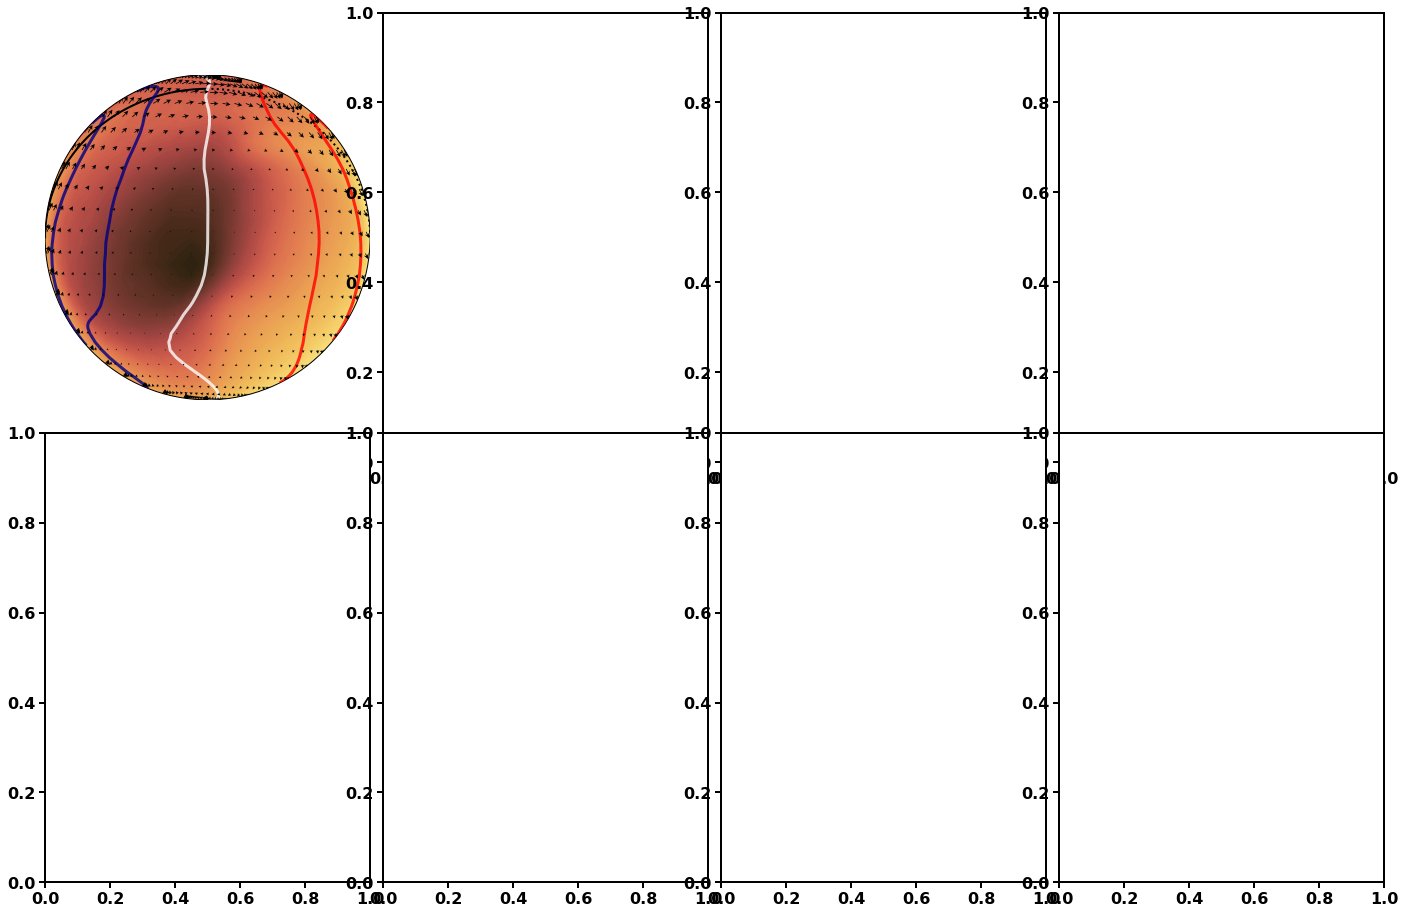

In [186]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(24,16))
plt.subplots_adjust(wspace=0.04, hspace=-0.065)

map = Basemap(projection='ortho',lat_0=0,lon_0=180,resolution='l', ax=ax[0, 0])



cs1 = map.contourf(x, y, final_temps, 100, cmap=my_colors, levels=np.arange(1000, 2000, 10))


map.contour(x, y, final_vlos, levels=[0],colors='white', linewidths=3,zorder=3, alpha=0.8)

map.contour(x, y, final_vlos, levels=[-4000, -3000, -2000, -1000], colors='red', alpha=0.8,
            linewidths=3, linestyles='solid',zorder=3)

map.contour(x, y, final_vlos, levels=[1000, 2000, 3000, 4000],  alpha=0.8,
                              colors='navy', linewidths=3,zorder=5)


map.drawgreatcircle(-90, 0, 180, 66, linewidth=2, color='black', linestyle='solid', zorder=1)
map.drawgreatcircle(90,  0, 180, 66, linewidth=2, color='black', linestyle='solid', zorder=2)

# Graph the wind vectors
map.quiver(x[::2,::2], y[::2,::2], final_us[::2,::2], final_vs[::2,::2], color='black',
          headwidth=6, scale = 220000, headlength=6, alpha=1.0, zorder=6) 